In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [45]:
import sklearn
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(0)
n_classes = 3
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                       random_state=2016, n_clusters_per_class=1,
                       n_classes=n_classes)

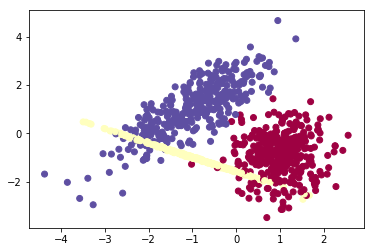

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

ohe = OneHotEncoder(categories=[range(n_classes)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

### Fit model

In [36]:
%load_ext autoreload

from deepnn.model import DeepNN
from deepnn.utils.layer import Layer
from deepnn.utils import activations
from deepnn.utils.batch_norm import BatchNorm

dnn = DeepNN([
    Layer(n=7, activation=activations.ReLU),
    Layer(n=4, activation=activations.tanh),
    Layer(n=3, activation=activations.softmax)
], lr=0.1, num_epochs=1000)

costs, relative_errors = dnn.fit(X_train, Y_train, gradient_checking=True)

In [37]:
relative_errors

[(99, 'OK', 2.0859315814451882e-10),
 (199, 'OK', 3.615947197115107e-10),
 (299, 'OK', 4.0965041608584507e-10),
 (399, 'OK', 6.553468369462847e-10),
 (499, 'OK', 6.742305090365351e-10),
 (599, 'WARNING', 0.0006005741392034791),
 (699, 'OK', 7.395644540780868e-10),
 (799, 'OK', 8.777025286711171e-10),
 (899, 'OK', 1.345087074365617e-09),
 (999, 'WARNING', 5.261636813254157e-05)]

### Accuracy

In [38]:
from sklearn.metrics import accuracy_score

def decode(x):
    return np.argmax(x, axis=0)

output_train = dnn.predict(X_train)
print(accuracy_score(decode(Y_train), decode(output_train)))
output_test = dnn.predict(X_test)
print(accuracy_score(decode(Y_test), decode(output_test)))

0.93
0.95


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(decode(Y_test), decode(output_test))

array([[28,  1,  1],
       [ 0, 36,  0],
       [ 0,  3, 31]])

In [40]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), cmap=plt.cm.Spectral)
    plt.show()

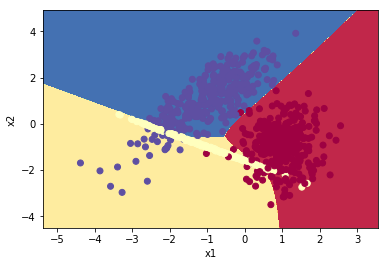

In [41]:
plot_decision_boundary(lambda x: decode(dnn.predict(x)), X_train, np.argmax(Y_train, axis=0))

### Cost

In [42]:
def cost_stats(costs):
    return pd.DataFrame([[
        np.max(costs),
        np.argmax(costs),
        np.min(costs),
        np.argmin(costs),
        np.mean(costs),
        np.std(costs)
    ]], columns=['max', 'argmax', 'min', 'argmin', 'mean', 'std'])

cost_stats(costs)

,max,argmax,min,argmin,mean,std
0,0.923075,0,0.171891,999,0.254491,0.100494


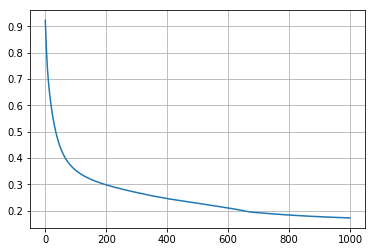

In [43]:
plt.plot(costs)
plt.grid(True)
plt.show()